# Indicadores de enfermedades cardíacas: Utilizando datos clínicos y de estilo de vida para predecir enfermedades cardíacas

## INTRODUCCIÓN
Este trabajo aborda el desafío de identificar y prevenir las enfermedades del corazón prematuramente, las cuales representan una de las principales razones de fallecimiento en los Estados Unidos. Mediante el estudio de factores de riesgo críticos como la hipertensión, el colesterol alto, el consumo de tabaco, la diabetes, la obesidad y el sedentarismo, se propone crear un modelo predictivo basado en aprendizaje automático que pueda estimar el riesgo cardíaco de una persona. Utilizando métodos de análisis de datos sofisticados, se busca descubrir patrones y correlaciones en la información clínica que faciliten la identificación precoz de riesgos, adoptando así estrategias de prevención para fortalecer la salud del corazón. El objetivo de este proyecto es ofrecer una herramienta valiosa para los médicos que apoye en la toma de decisiones clínicas y fomente un enfoque de cuidado preventivo y personalizado, contribuyendo a disminuir la prevalencia de enfermedades cardíacas en la sociedad.



 ## CARACTERÍSTICAS
 
A continuación, se muestra una breve descripción con el significado de cada variable para una mejor comprensión acerca del problema a tratar.

## Variables del estudio:

HeartDisease: Indica si los participantes reportaron haber sido diagnosticados con enfermedad cardíaca coronaria (CHD) o haber sufrido un infarto de miocardio (IM).

IMC: Representa el Índice de Masa Corporal, una medida que relaciona el peso con la altura.

Smoking: Indica si el encuestado ha fumado más de 100 cigarrillos en su vida (respuesta binaria Sí o No).

AlcoholDrinking: Define a los consumidores habituales de alcohol (varones que consumen más de 14 bebidas a la semana y mujeres que consumen más de 7 bebidas a la semana).

Stroke: Señala si al participante le han diagnosticado previamente un accidente cerebrovascular.

PhysicalHealth: Refiere a la cantidad de días en los últimos 30 días que la salud física del participante fue deficiente, incluyendo enfermedades y lesiones.

MentalHealth: Cantidad de días en los últimos 30 días en que la salud mental del participante fue deficiente.

DiffWalking: Se refiere a la presencia de dificultades significativas para caminar o subir escaleras.

Sex: Género del participante, masculino o femenino.

AgeCategory: Agrupación en catorce categorías de edad.

Race: Categoría de raza/etnia asignada al participante.

Diabetic: Indica si al participante le han diagnosticado diabetes.

PhysicalActivity: Denota si el adulto ha realizado alguna actividad física o ejercicio en los últimos 30 días, aparte de su actividad laboral habitual.

GenHealth: Percepción general del estado de salud del participante.

SleepTime: Promedio de horas de sueño en un lapso de 24 horas.

Asthma: Señala si al participante le han diagnosticado asma.

KidneyDisease: Indica diagnósticos de enfermedad renal, excluyendo cálculos renales, infecciones de vejiga o incontinencia.

SkinCancer: Indica si al participante le han diagnosticado cáncer de piel.

# ANÁLISIS EXPLORATORIO DE DATOS (EDA)

In [68]:
# Importamos las distintas librerias necesarias para el análisis

# Tratamiento de datos
import numpy as np
import pandas as pd


# Tratamiento de las variables categóricas que se pueden ordenar
from sklearn.preprocessing import LabelEncoder

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns


In [70]:

df= pd.read_csv("heart_2020_cleaned.csv")
df

,HeartDisease,Smoking,Stroke,DiffWalking,Sex,AgeCategory_encoded,Diabetic_encoded,BMI_Category_Ordinal,GrupoSalud_Ordinal,GrupoSalud_Mental_Ordinal,SleepGroup_Ordinal
0,0,1,0,0,0,7,2,1,1,3,1
1,0,0,1,0,0,12,0,2,1,1,3
2,0,1,0,0,1,9,2,3,3,3,3
3,0,0,0,0,0,11,0,2,1,1,2
4,0,0,0,1,0,4,0,2,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...
319790,1,1,0,1,1,8,2,3,2,1,2
319791,0,1,0,0,1,3,0,4,1,1,1
319792,0,0,0,0,0,5,0,2,1,1,2
319793,0,0,0,0,0,1,0,4,1,1,3


In [51]:

# No nos encontramos con valores nulos
# Todos los valores son numérico

In [22]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   HeartDisease               319795 non-null  int64
 1   Smoking                    319795 non-null  int64
 2   Stroke                     319795 non-null  int64
 3   DiffWalking                319795 non-null  int64
 4   Sex                        319795 non-null  int64
 5   AgeCategory_encoded        319795 non-null  int64
 6   Diabetic_encoded           319795 non-null  int64
 7   BMI_Category_Ordinal       319795 non-null  int64
 8   GrupoSalud_Ordinal         319795 non-null  int64
 9   GrupoSalud_Mental_Ordinal  319795 non-null  int64
 10  SleepGroup_Ordinal         319795 non-null  int64
dtypes: int64(11)
memory usage: 26.8 MB


In [23]:
df.isnull().sum()

HeartDisease                 0
Smoking                      0
Stroke                       0
DiffWalking                  0
Sex                          0
AgeCategory_encoded          0
Diabetic_encoded             0
BMI_Category_Ordinal         0
GrupoSalud_Ordinal           0
GrupoSalud_Mental_Ordinal    0
SleepGroup_Ordinal           0
dtype: int64

In [24]:
# No nos encontramos con valores nulos

In [25]:
df.describe(include="all")

,HeartDisease,Smoking,Stroke,DiffWalking,Sex,AgeCategory_encoded,Diabetic_encoded,BMI_Category_Ordinal,GrupoSalud_Ordinal,GrupoSalud_Mental_Ordinal,SleepGroup_Ordinal
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,0.412477,0.037740,0.138870,0.475273,6.514536,0.300386,3.239397,1.252524,1.311559,2.602086
std,0.279766,0.492281,0.190567,0.345812,0.499389,3.564759,0.716480,1.156954,0.592778,0.618505,0.654872
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,2.000000,1.000000,1.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,3.000000,1.000000,1.000000,3.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,9.000000,0.000000,4.000000,1.000000,1.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,3.000000,6.000000,3.000000,3.000000,3.000000


In [26]:
# Para ver el contenido de valores únicos de cada variable
for column in df.columns :
    unique_values = df[column].unique()
    print(column, unique_values)

HeartDisease [0 1]
Smoking [1 0]
Stroke [0 1]
DiffWalking [0 1]
Sex [0 1]
AgeCategory_encoded [ 7 12  9 11  4 10  8  6  5  0  3  2  1]
Diabetic_encoded [2 0 1 3]
BMI_Category_Ordinal [1 2 3 4 6 5]
GrupoSalud_Ordinal [1 3 2]
GrupoSalud_Mental_Ordinal [3 1 2]
SleepGroup_Ordinal [1 3 2]


# VISUALIZACIONES

In [31]:
# Lista de variables binarias (0,1)
binary_columns = ["Smoking", "Stroke", "DiffWalking", "Sex"]


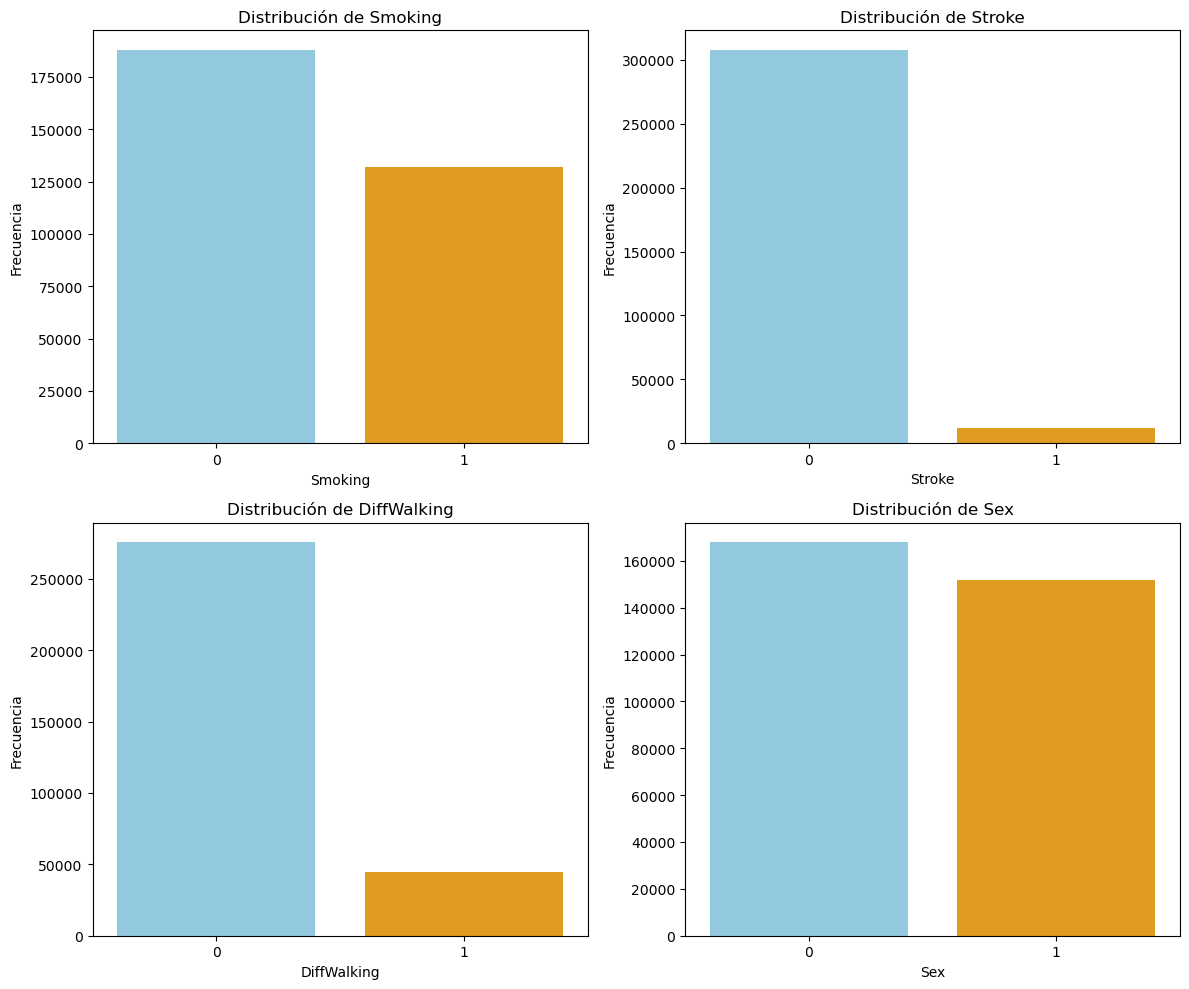

In [34]:
# Configuración de los subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)

# Lista de colores para las barras
colors = ["skyblue", "orange"]

# Gráfico de barras para la primera variable binaria
sns.countplot(x=binary_columns[0], data=df, ax=axes[0, 0], palette=colors)
axes[0, 0].set_title(f'Distribución de {binary_columns[0]}')
axes[0, 0].set_xlabel(binary_columns[0])
axes[0, 0].set_ylabel('Frecuencia')

# Gráfico de barras para la segunda variable binaria
sns.countplot(x=binary_columns[1], data=df, ax=axes[0, 1], palette=colors)
axes[0, 1].set_title(f'Distribución de {binary_columns[1]}')
axes[0, 1].set_xlabel(binary_columns[1])
axes[0, 1].set_ylabel('Frecuencia')

# Gráfico de barras para la tercera variable binaria
sns.countplot(x=binary_columns[2], data=df, ax=axes[1, 0], palette=colors)
axes[1, 0].set_title(f'Distribución de {binary_columns[2]}')
axes[1, 0].set_xlabel(binary_columns[2])
axes[1, 0].set_ylabel('Frecuencia')

# Gráfico de barras para la cuarta variable binaria
sns.countplot(x=binary_columns[3], data=df, ax=axes[1, 1], palette=colors)
axes[1, 1].set_title(f'Distribución de {binary_columns[3]}')
axes[1, 1].set_xlabel(binary_columns[3])
axes[1, 1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()



Al revisar los gráficos de las variables "DiffWalking" y "Stroke", se nota que hay un desbalance .Este desequilibrio puede tener un impacto negativo en el rendimiento del modelo de aprendizaje automático, ya que puede sesgar la capacidad de aprendizaje y generar resultados sesgados hacia la clase mayoritaria. Por lo tanto, es importante abordar y gestionar este desequilibrio de manera efectiva para mejorar el modelo.

In [35]:
 #  visualizar la distribución de la variable "HeartDisease" 

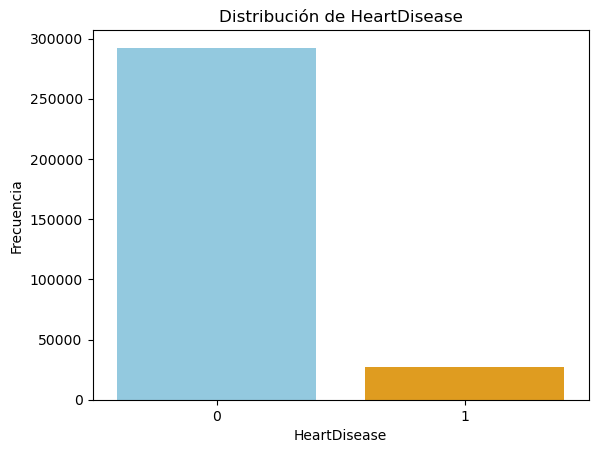

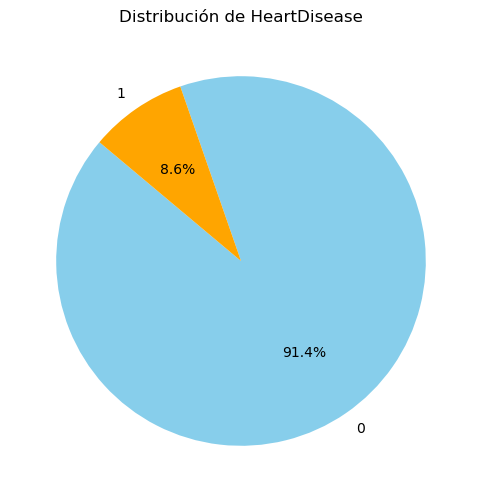

In [72]:
sns.countplot(x="HeartDisease", data=df, palette=['skyblue', 'orange'])
plt.title('Distribución de HeartDisease')
plt.xlabel('HeartDisease')
plt.ylabel('Frecuencia')
plt.show()


# Calcular las frecuencias de cada categoría en 'HeartDisease'
frequencies = df['HeartDisease'].value_counts()

plt.figure(figsize=(8, 6)) 
plt.pie(frequencies, labels=frequencies.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.title('Distribución de HeartDisease')
plt.show()


La variable objetivo "HeartDisease" en el conjunto de datos muestra un desbalanceo de clases, con aproximadamente el 91% de los casos clasificados como ausencia de enfermedades cardíacas ("No") y solo cerca del 9% indicando presencia de enfermedades cardíacas ("Sí").


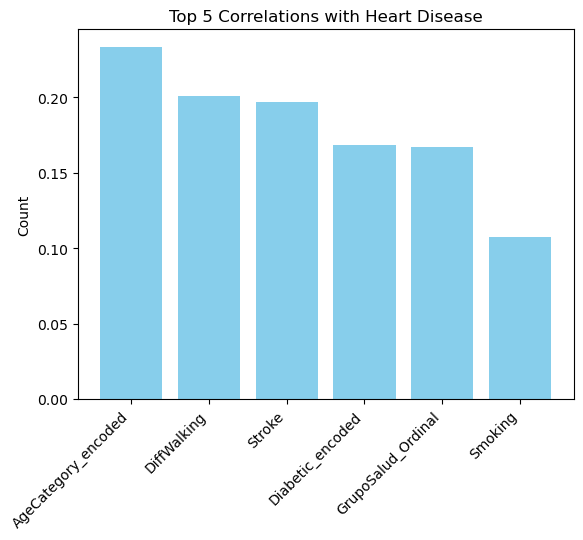

In [88]:
correlation = df.corrwith(df['HeartDisease']).sort_values(ascending=False)
corr_5 = correlation.head(7)[correlation != 1]

plt.bar(corr_5.index, corr_5.values, color='skyblue')  
plt.ylabel('Count')
plt.title('Top 5 Correlations with Heart Disease')
plt.xticks(rotation=45, ha='right')  
plt.show()


# VARIABLES CATEGÓRICAS

In [46]:
 # Índice de masa corporal (BMI)

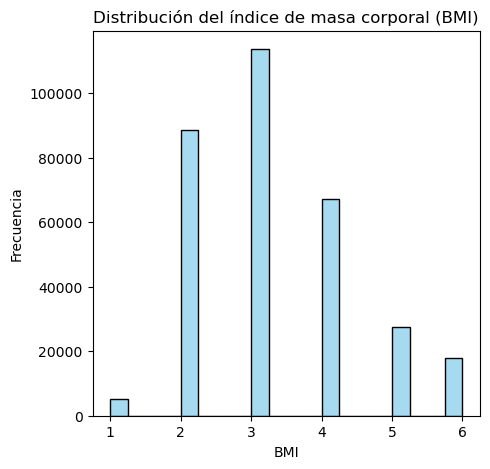

In [47]:
# Histograma del índice de masa corporal (BMI) en la variable de "BMI_Category_Ordinal"
plt.figure(figsize=(5, 5))
sns.histplot(df['BMI_Category_Ordinal'], bins=20, color='skyblue')
plt.title('Distribución del índice de masa corporal (BMI)')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.show()


In [ ]:
# Índice de masa corporal (BMI) VS "HeartDisease"

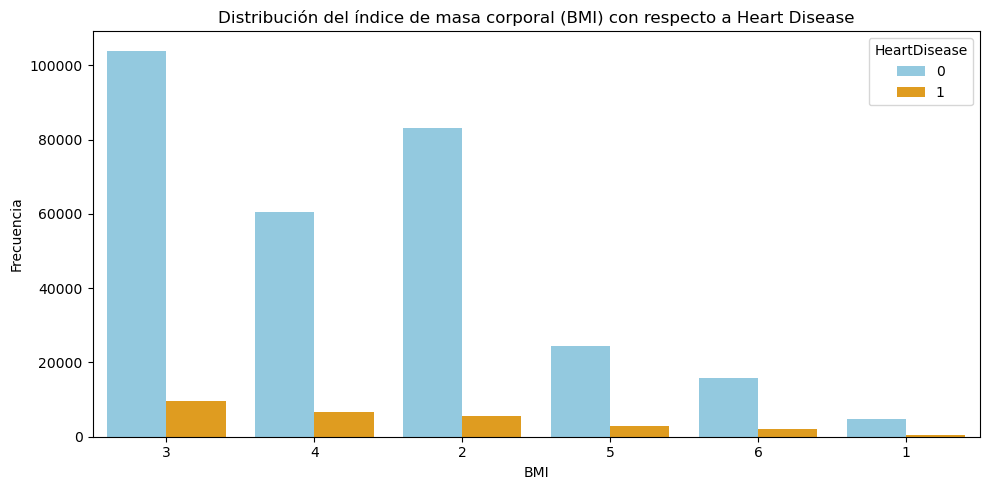

In [60]:
plt.figure(figsize=(10, 5))

order = df[df['HeartDisease'] == 1]['BMI_Category_Ordinal'].value_counts().index


sns.countplot(data=df, x='BMI_Category_Ordinal', hue='HeartDisease', linewidth=0.5,
              order=order, palette=['skyblue', 'orange']) 

plt.title('Distribución del índice de masa corporal (BMI) con respecto a Heart Disease')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')

plt.tight_layout() 
plt.show()


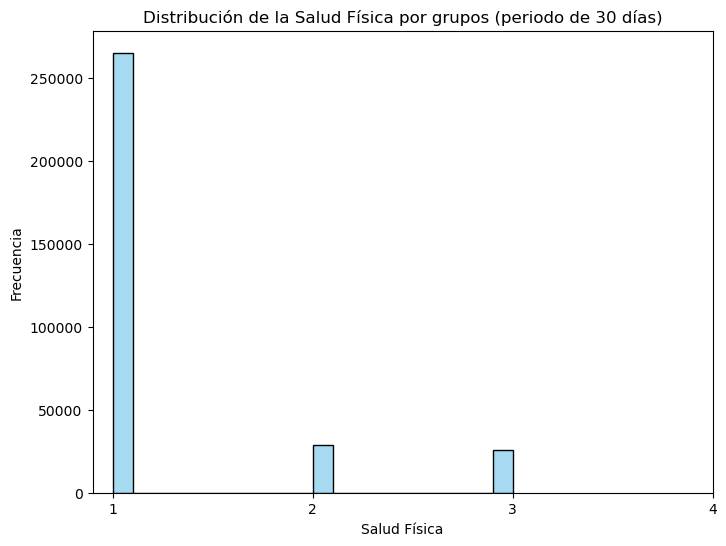

In [66]:
# Visualización de datos de la variable "GrupoSalud_Ordinal" 
plt.figure(figsize=(8, 6))
sns.histplot(df['GrupoSalud_Ordinal'], bins=20, color='skyblue')  
plt.title('Distribución de la Salud Física por grupos (periodo de 30 días)')
plt.xlabel('Salud Física')
plt.ylabel('Frecuencia')
plt.xticks(range(1, 5)) 
plt.show()


La distribución de la salud física por grupos (periodo de 30 días) revela que la mayoría de las personas se encuentran en el grupo de "Buena salud" (número 1). Por otro lado, se observa una disminución significativa en el número de personas que pertenecen a los grupos de "Salud moderada" y "Mala salud".

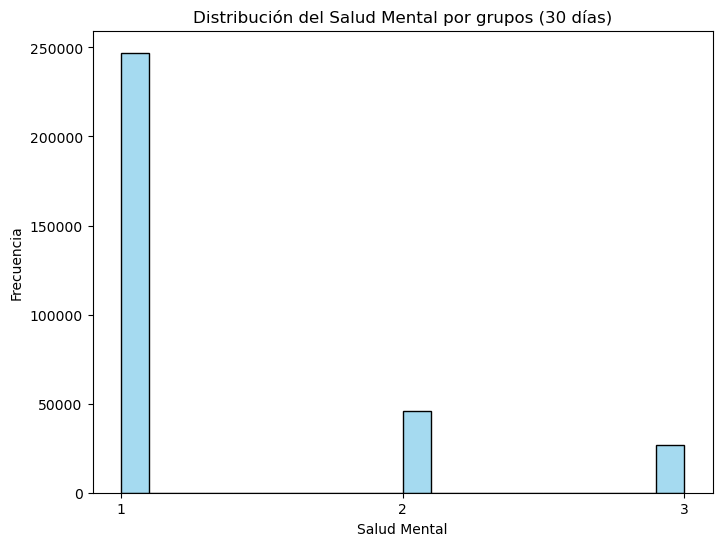

In [67]:
# Visualización de datos de la variable "GrupoSalud_Mental_Ordinal"
plt.figure(figsize=(8, 6))
sns.histplot(df['GrupoSalud_Mental_Ordinal'], bins= 20,color='skyblue')
plt.title('Distribución del Salud Mental por grupos (30 días)')
plt.xlabel('Salud Mental')
plt.ylabel('Frecuencia')
plt.xticks(range(1, 4))
plt.show()

La distribución de la salud psíquica por grupos (30 días) revela que la mayoría de las personas se encuentran en el grupo de "Buena salud" (número 1). En segundo lugar, se observa un número considerablemente menor de personas en el grupo de "Salud moderada" (número 2), aunque con una diferencia significativa respecto al grupo de "Buena salud". Por último, el grupo de "Mala salud" (número 3) presenta valores aún más bajos en comparación con los grupos anteriores

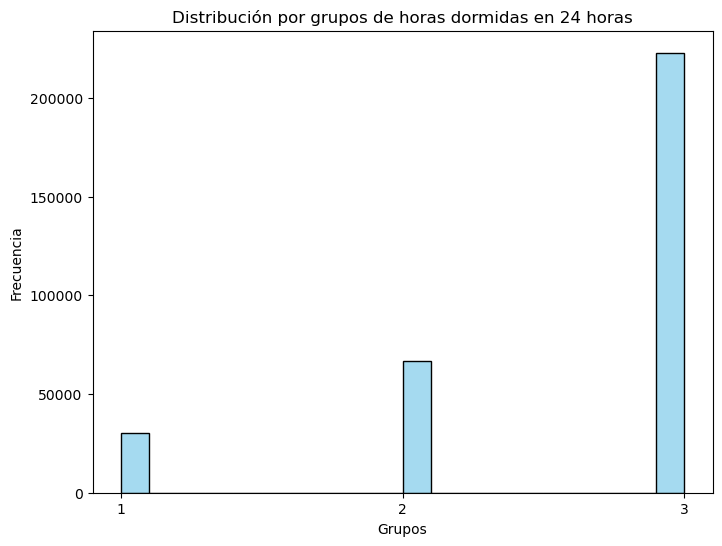

In [91]:
# Visualización de datos de la variable "GrupoSalud_Mental_Ordinal"
plt.figure(figsize=(8, 6))
sns.histplot(df['SleepGroup_Ordinal'], bins= 20, color='skyblue')
plt.title('Distribución por grupos de horas dormidas en 24 horas')
plt.xlabel('Grupos')
plt.ylabel('Frecuencia')
plt.xticks(range(1, 4))
plt.show()

# Matriz de correlacion

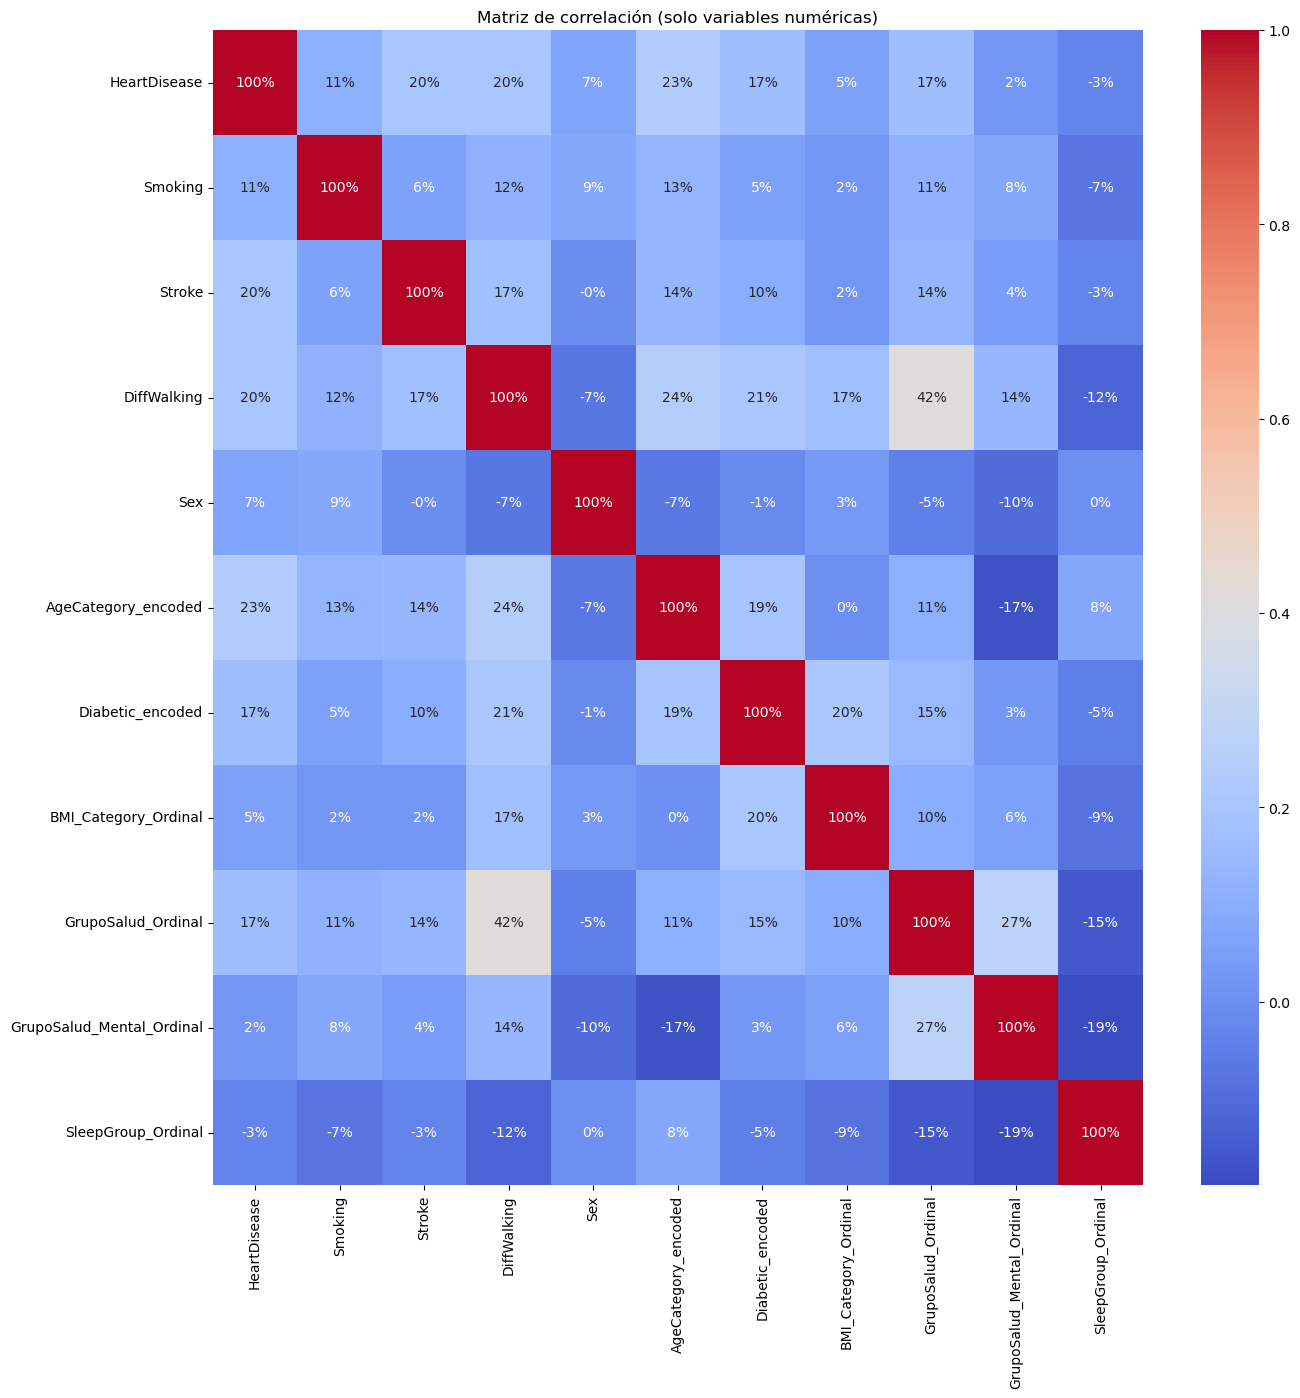

In [92]:
# Seleccionamos las columnas numéricas unicamente dejando fuera las de tipo object
numeric_columns = df.select_dtypes(include=['int32', 'float64', 'int64']).columns

# Calculamos la matriz de correlación para las columnas numéricas
correlation_matrix = df[numeric_columns].corr()

# Creamos mapa de calor de correlación
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".0%" )
plt.title('Matriz de correlación (solo variables numéricas)')
plt.show()

In [93]:
corr_matrix = df.corr()
corr_matrix['HeartDisease'].sort_values(ascending=False) *100

HeartDisease                 100.000000
AgeCategory_encoded           23.343224
DiffWalking                   20.125805
Stroke                        19.683530
Diabetic_encoded              16.855285
GrupoSalud_Ordinal            16.731876
Smoking                       10.776416
Sex                            7.004048
BMI_Category_Ordinal           5.342468
GrupoSalud_Mental_Ordinal      2.130066
SleepGroup_Ordinal            -3.456049
Name: HeartDisease, dtype: float64

AgeCategory_encoded: Esta variable muestra una correlación positiva del 23% con "HeartDisease". Indica que a medida que aumenta la categoría de edad, es más probable que alguien haya padecido una enfermedad cardíaca.